### Problem Statement
- The job market is becoming increasingly competitive, and employers, policymakers, and researchers often look for ways to understand the factors that influence income levels. 

- Being able to predict whether an individual is likely to earn more than $50,000 per year can provide useful insights into economic patterns and workforce characteristics.

- This project focuses on developing a machine learning (ML) model that predicts whether an individual's annual income exceeds $50,000 using the UCI Adult Census Income dataset. The dataset contains demographic and employment-related variables such as age, education, occupation, work hours, and marital status. By training and evaluating predictive models on this data, the project aims to highlight which factors are most influential in determining income levels and to demonstrate how ML can be applied to real-world socioeconomic questions.

### Project and Data Descriptiom

Below is a description of the dataset:

- Age: Discrete variable representing the individual’s age.

- Workclass: Categorical variable indicating the type of employment sector, with values such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, and Never-worked.

- Fnlwgt: Continuous variable representing the sampling weight, which reflects the number of people in the population that each record represents.

- Education: Categorical variable indicating the highest level of formal education attained. Categories include Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, and Preschool.

- Education-num: Continuous variable representing the number of years of education completed.

- Marital-status: Categorical variable describing current marital condition, including Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse.

- Occupation: Categorical variable indicating type of job. Categories include Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, and Armed-Forces.

- Relationship: Categorical variable describing the individual’s role within the household. Categories include Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried.

- Race: Categorical variable capturing ethnic background, including White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, and Black.

- Sex: Categorical variable representing biological sex, with values Female and Male.

- Capital-gain: Continuous variable representing income from capital gains.

- Capital-loss: Continuous variable representing losses from capital assets.

- Hours-per-week: Continuous variable representing the average number of hours worked per week.

- Native-country: Categorical variable indicating country of origin. Categories include United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, and Holand-Netherlands.

- Income (Target): The dependent variable representing the income level of the individual.

The project follows the CRoss Industry Standard Process for Data Mining (CRISP-DM) in sequential steps.

### Package Importation

In [1]:
## Importing necessary libraries

#Importing data manipulation libraries
import pandas as pd
import numpy as np

#Importing preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing 4 best classifiers
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Importing model selection and evaluation libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Extracting columns from names file

In [2]:

# read adult.names (or just 'adult' if that's the filename)
with open("adultcolumns.txt", "r") as f:
    lines = f.readlines()

# filter out only the attribute lines
cols = []
for line in lines:
    if ":" in line:  # attributes are defined with a colon
        cols.append(line.split(":")[0].strip())

# now load the data
salary_df = pd.read_csv("adult.data", header=None, names=cols)

print(salary_df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [3]:
salary_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(salary_df.info())  # Check for missing values and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
print(f'Number of rows are: {len(salary_df)}')
print('\n')
print(salary_df.describe())  # Summary statistics

Number of rows are: 32561


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


### Exploratory Data Analysis

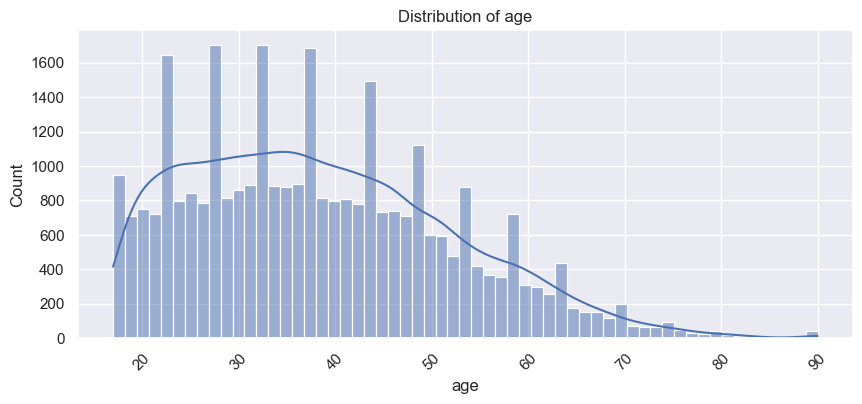

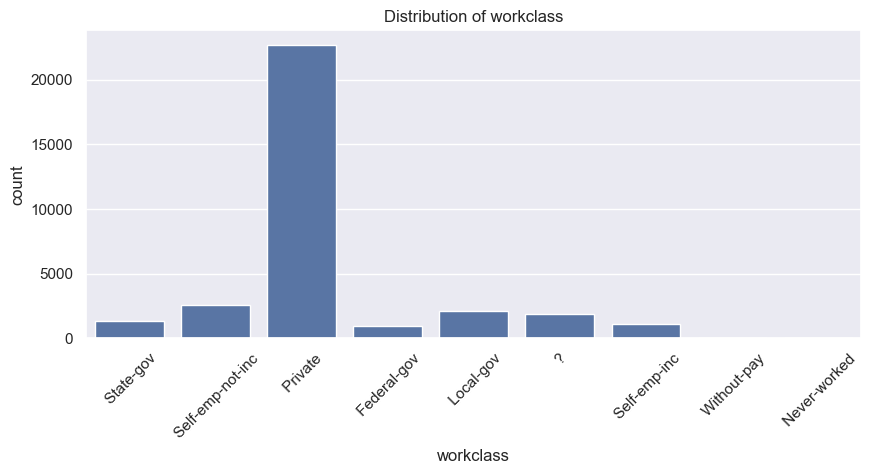

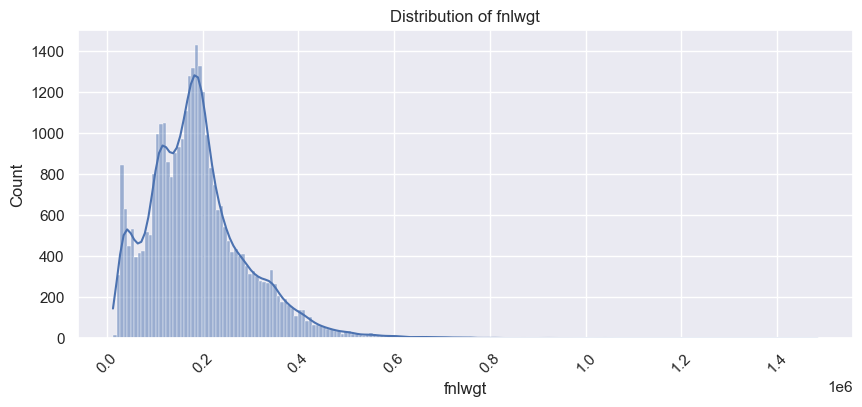

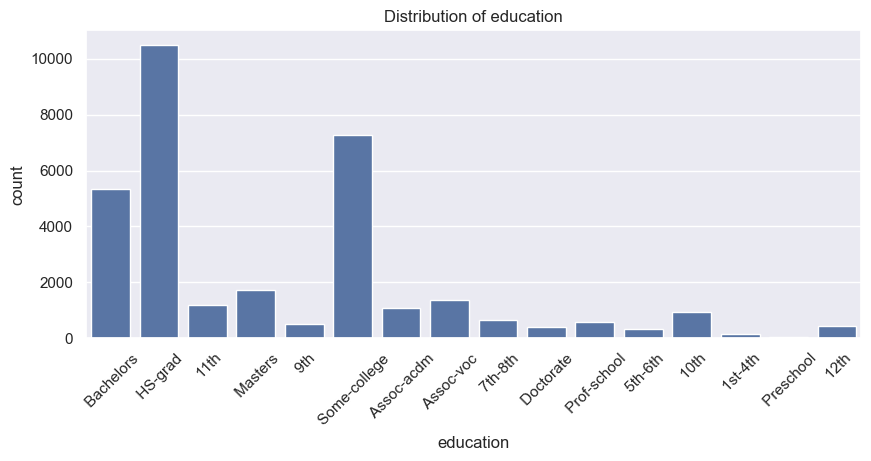

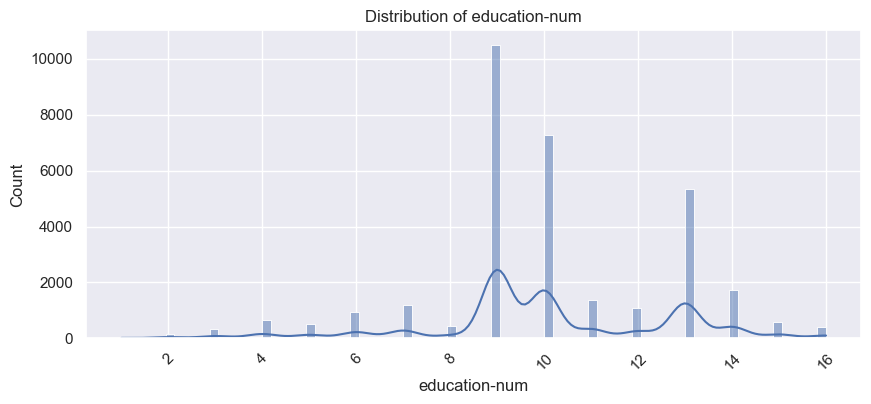

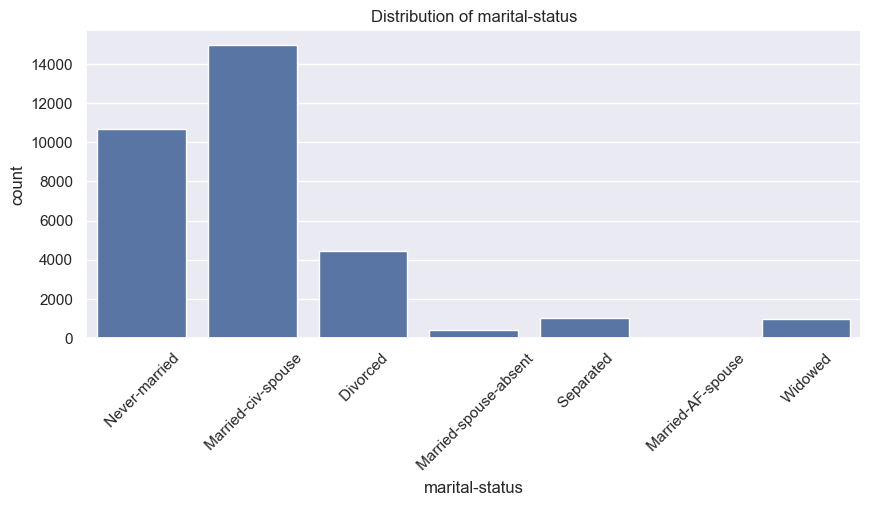

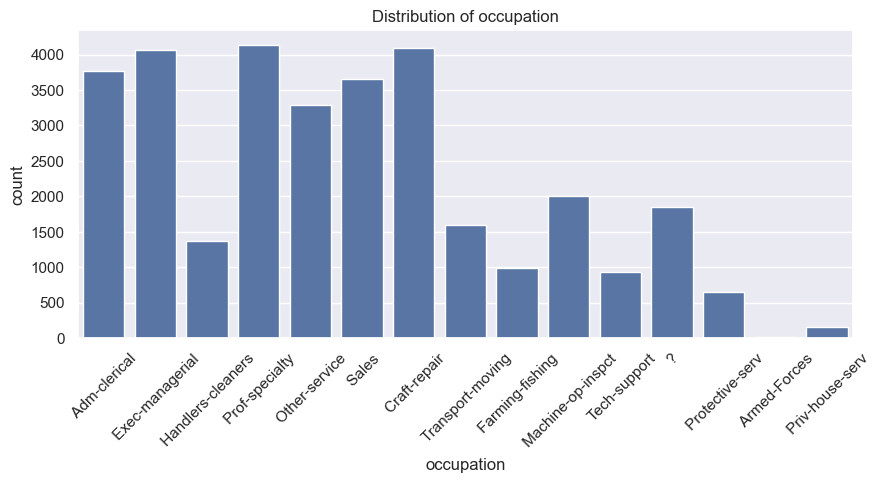

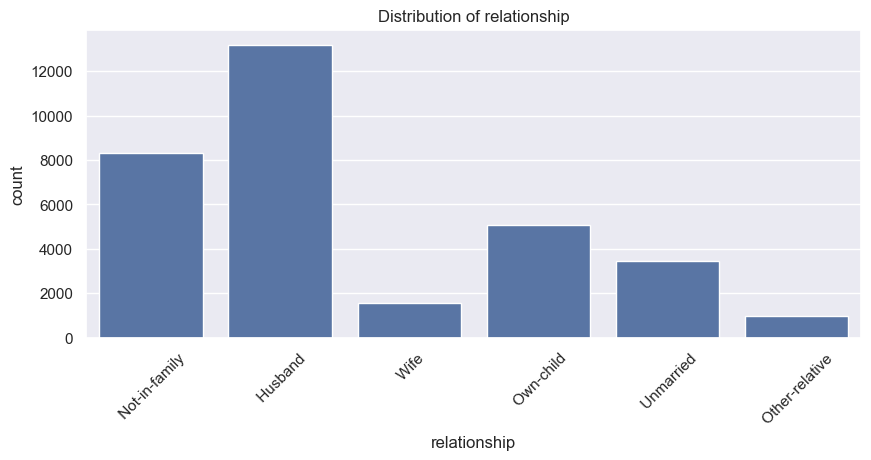

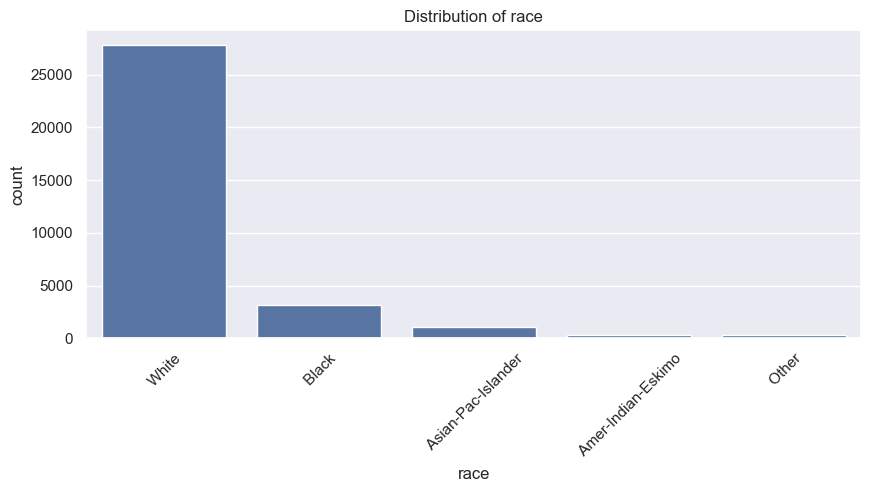

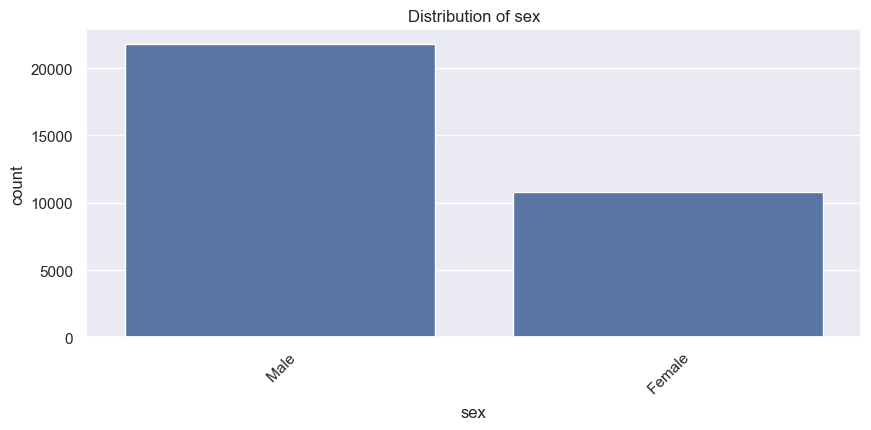

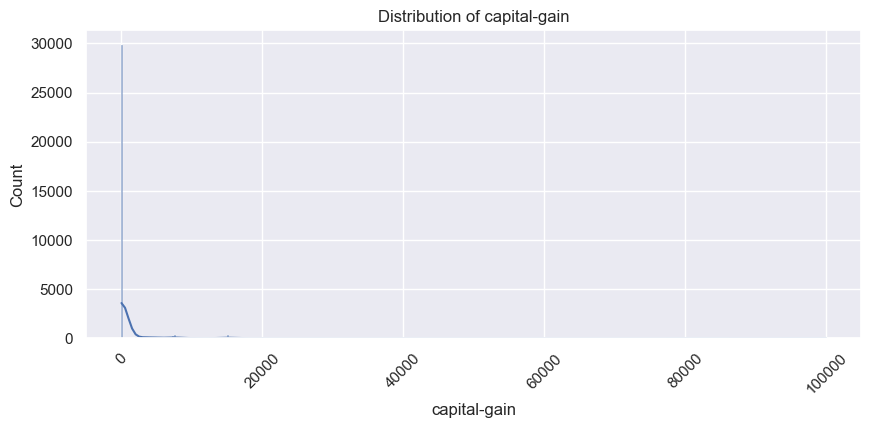

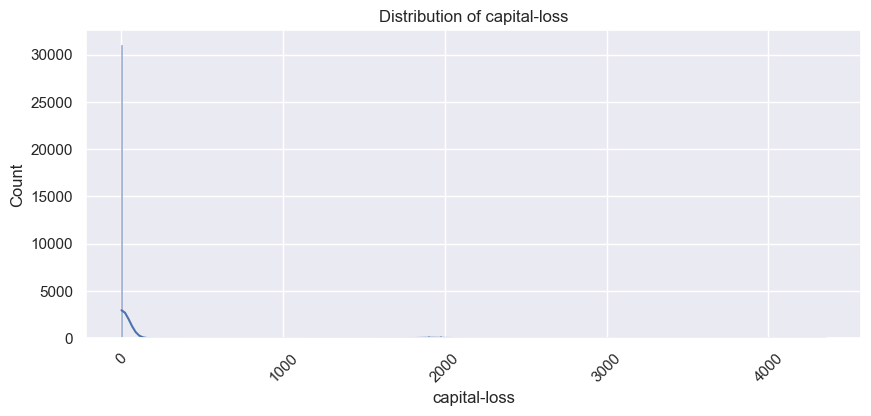

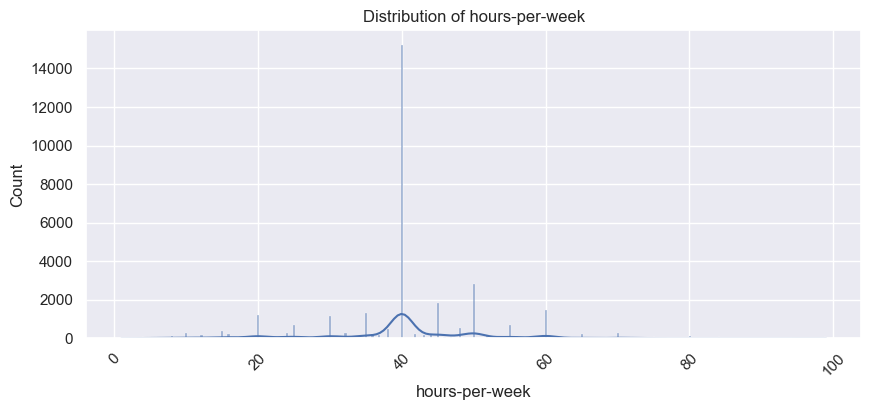

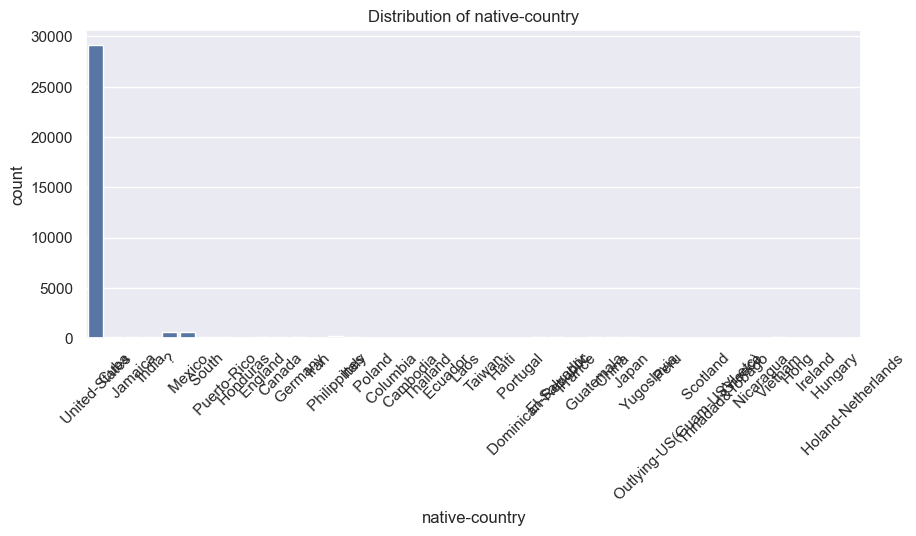

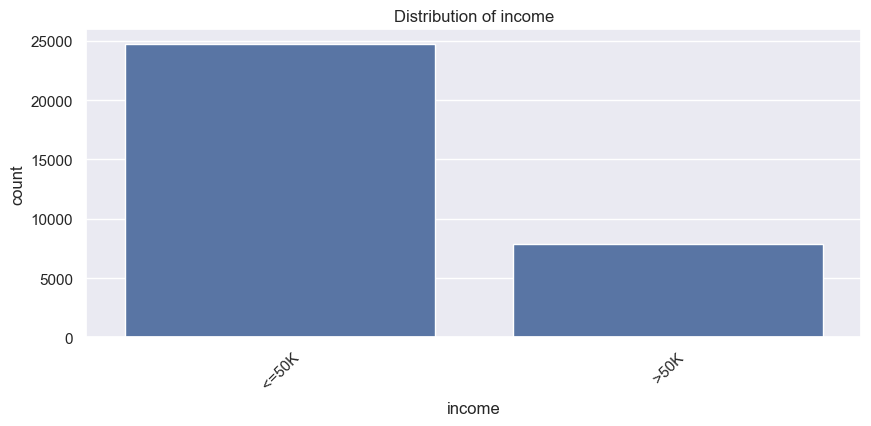

In [6]:
#visualise data in all columns with black background and add description of each column
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")
for column in salary_df.columns:
    plt.figure(figsize=(10, 4))
    if salary_df[column].dtype == 'object':
        sns.countplot(data=salary_df, x=column)
    else:
        sns.histplot(data=salary_df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
# show distinct values in each column
for column in salary_df.columns:
    if salary_df[column].dtype == 'object':
        print(f'Column: {column}')
        print(salary_df[column].value_counts())
        print('\n')

Column: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Column: education
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


Column: marital-status
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


Column: occupation


### Data Cleaning

In [8]:
#change ? to unknown in workclass, occupation, native-country
salary_df.replace(' ?', 'Unknown', inplace=True)

In [9]:
# remove spaces in dataset. This method applies the strip function to each element in the DataFrame by using applymap and isinstance to check for strings.
salary_df = salary_df.applymap(lambda x: x.strip() if isinstance(x, str) else x) 

In [10]:
print(salary_df.isnull().sum())  # Check for missing values again

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Index(['United-States', 'Mexico', 'Unknown', 'Philippines', 'Germany'], dtype='object', name='native-country')


Text(0.5, 1.0, 'Top 5 Countries in Native-Country Column')

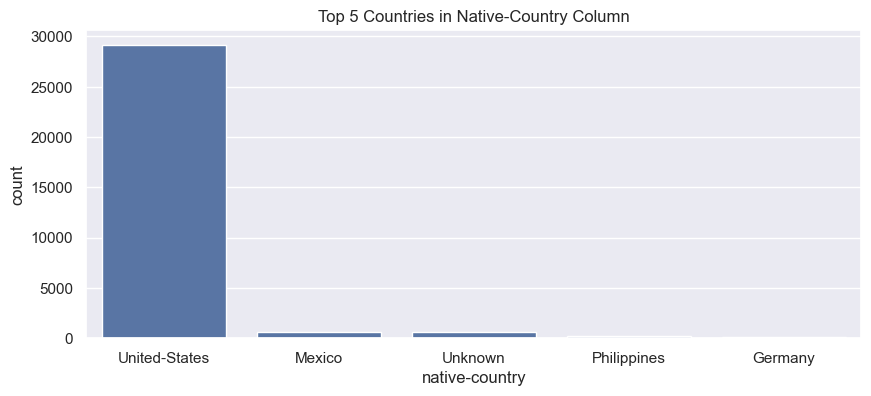

In [11]:
#native country column has many categories, getting top 5 countries and grouping rest as 'Other'
top_countries = salary_df['native-country'].value_counts().nlargest(5).index
print(top_countries)
#visualise top countries
plt.figure(figsize=(10, 4))
sns.countplot(data=salary_df, x='native-country', order=top_countries)
plt.title('Top 5 Countries in Native-Country Column')

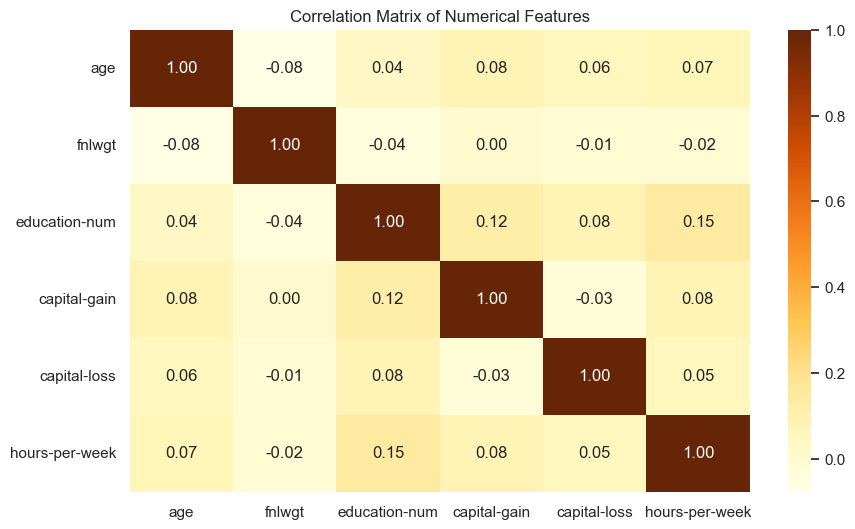

In [12]:
#visualising correlation matrix of numerical columns
numerical_cols = salary_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = salary_df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Class Balance of Taget Variable

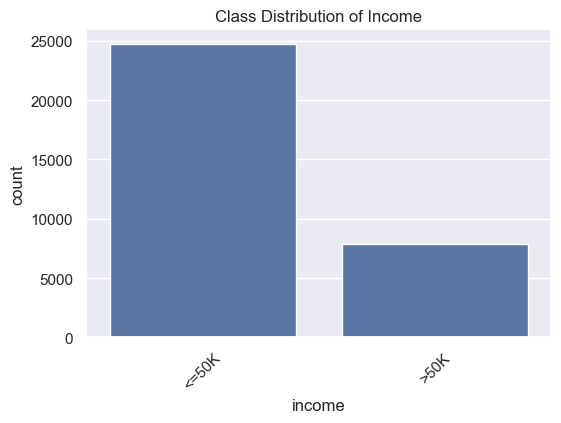

In [13]:
#visualising class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=salary_df, x='income')
plt.title('Class Distribution of Income')
plt.xticks(rotation=45)
plt.show()


### Feature engineering and selection

In [14]:
#Feature engineering and selection
salary_df_copy = salary_df.copy()  # Create a copy to avoid SettingWithCopyWarning

In [15]:
#feature engineering of age and hours-per-week columns
salary_df_copy['age_group'] = pd.cut(salary_df_copy['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
salary_df_copy['hours_per_week_group'] = pd.cut(salary_df_copy['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Over-utime', 'Workaholic'])
salary_df_copy.drop(['age', 'hours-per-week'], axis=1, inplace=True)  # Drop original columns if not needed

In [16]:
#feature engineering of education column
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Doctorate']
salary_df_copy['education'] = pd.Categorical(salary_df_copy['education'], categories=education_order, ordered=True)
salary_df_copy['education'] = salary_df_copy['education'].cat.codes  # Convert to numerical codes

In [17]:
salary_df_copy.head()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,age_group,hours_per_week_group
0,State-gov,77516,12,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,Middle-aged,Full-time
1,Self-emp-not-inc,83311,12,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,Senior,Part-time
2,Private,215646,8,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,Middle-aged,Full-time
3,Private,234721,6,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,Senior,Full-time
4,Private,338409,12,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,Middle-aged,Full-time


In [18]:
#converting categorical columns to numerical using label encoding
for column in salary_df_copy.select_dtypes(include=['object','category']).columns:
    le = LabelEncoder()
    salary_df_copy[column] = le.fit_transform(salary_df_copy[column])


In [19]:
# checking the unique values in each column after feature engineering
for column in salary_df_copy.columns:
    print(f'Column: {column}, Unique Values: {salary_df_copy[column].nunique()}')

Column: workclass, Unique Values: 9
Column: fnlwgt, Unique Values: 21648
Column: education, Unique Values: 16
Column: education-num, Unique Values: 16
Column: marital-status, Unique Values: 7
Column: occupation, Unique Values: 15
Column: relationship, Unique Values: 6
Column: race, Unique Values: 5
Column: sex, Unique Values: 2
Column: capital-gain, Unique Values: 119
Column: capital-loss, Unique Values: 92
Column: native-country, Unique Values: 42
Column: income, Unique Values: 2
Column: age_group, Unique Values: 4
Column: hours_per_week_group, Unique Values: 4


In [20]:
# splitting the data into features and target variable
X = salary_df_copy.drop('income', axis=1)
y = salary_df_copy['income']

#splitting the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
X_train = pd.DataFrame(X_train)

In [22]:
# Fit and transform on X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')
print('\n')
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train.value_counts(normalize=True))
print('\n')
print(y_test.value_counts(normalize=True))
print('\n')

Training set shape: (24420, 14), Testing set shape: (8141, 14)


[[-0.22326564  0.40140267  0.0693073  ...  0.25881136 -0.73527442
  -0.68025158]
 [-0.22326564  1.373397    0.78509678 ...  0.25881136 -0.73527442
   0.5733703 ]
 [-0.22326564 -0.47482015  0.0693073  ... -2.53329245  1.65575045
  -0.68025158]
 ...
 [-0.22326564 -1.0216555  -0.28858744 ...  0.25881136  0.46023802
   0.5733703 ]
 [-0.22326564 -1.32428816  1.14299152 ...  0.25881136 -0.73527442
   0.5733703 ]
 [-0.22326564  2.12561079 -1.36227167 ...  0.25881136  1.65575045
  -0.68025158]]


[[ 1.17543805 -0.25897776  0.0693073  ...  0.25881136  0.46023802
  -0.68025158]
 [-0.22326564 -0.02169752 -0.28858744 ...  0.25881136 -0.73527442
  -0.68025158]
 [-0.22326564  0.65184784  0.0693073  ...  0.25881136 -0.73527442
   0.5733703 ]
 ...
 [-0.22326564 -0.34693909  0.0693073  ...  0.25881136  1.65575045
  -0.68025158]
 [ 1.8747899   1.24231442 -0.28858744 ...  0.25881136 -0.73527442
  -0.68025158]
 [-0.22326564 -0.26146153  1.14

### Model Training and Evaluation

In [24]:
#Training each model and evaluating their performance adding cross
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')

--- Logistic Regression ---
Accuracy: 0.8234
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6181
           1       0.71      0.45      0.55      1960

    accuracy                           0.82      8141
   macro avg       0.78      0.70      0.72      8141
weighted avg       0.81      0.82      0.81      8141

Confusion Matrix:
[[5823  358]
 [1080  880]]


--- Random Forest ---
Accuracy: 0.8468
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6181
           1       0.70      0.63      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
[[5665  516]
 [ 731 1229]]


--- Support Vector Machine ---
Accuracy: 0.8500
Classification Report:
              precision    recall  f1-score   suppo

### Hyperparameter Tuning and Model Selection

In [25]:
#best model is Gradient Boosting with accuracy of 87% and an f1-score of 92% for >50K class
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [26]:
 # Gradient Boosting Hyperparameter Tuning
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
gb = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': <scipy.stats....002AF3EDEA120>, 'max_depth': <scipy.stats....002AF469C82D0>, 'min_samples_leaf': <scipy.stats....002AF3EE44640>, 'min_samples_split': <scipy.stats....002AF469C8F50>, ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [27]:
#Best model parameters and evaluation
best_gb = random_search.best_estimator_
y_pred_best = best_gb.predict(X_test)
print('--- Best Gradient Boosting Model After Hyperparameter Tuning ---')
print(f'Best Parameters: {random_search.best_params_}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_best))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))

--- Best Gradient Boosting Model After Hyperparameter Tuning ---
Best Parameters: {'learning_rate': np.float64(0.14180095055973105), 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 151}
Accuracy: 0.8707
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6181
           1       0.77      0.65      0.71      1960

    accuracy                           0.87      8141
   macro avg       0.83      0.80      0.81      8141
weighted avg       0.87      0.87      0.87      8141

Confusion Matrix:
[[5809  372]
 [ 681 1279]]


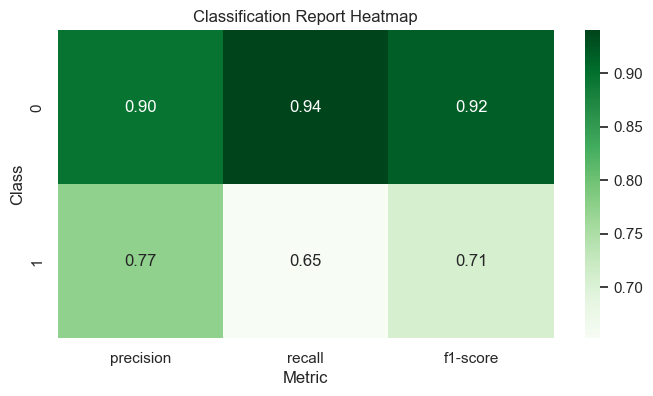

In [28]:
# visualising classification report for best model using heatmap
report_dict = classification_report(y_test, y_pred_best, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

metrics = ['precision', 'recall', 'f1-score']
class_names = [c for c in report_df.index if c not in ['accuracy', 'macro avg', 'weighted avg']]

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.loc[class_names, metrics], annot=True, cmap='Greens', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Class')
plt.xlabel('Metric')
plt.show()


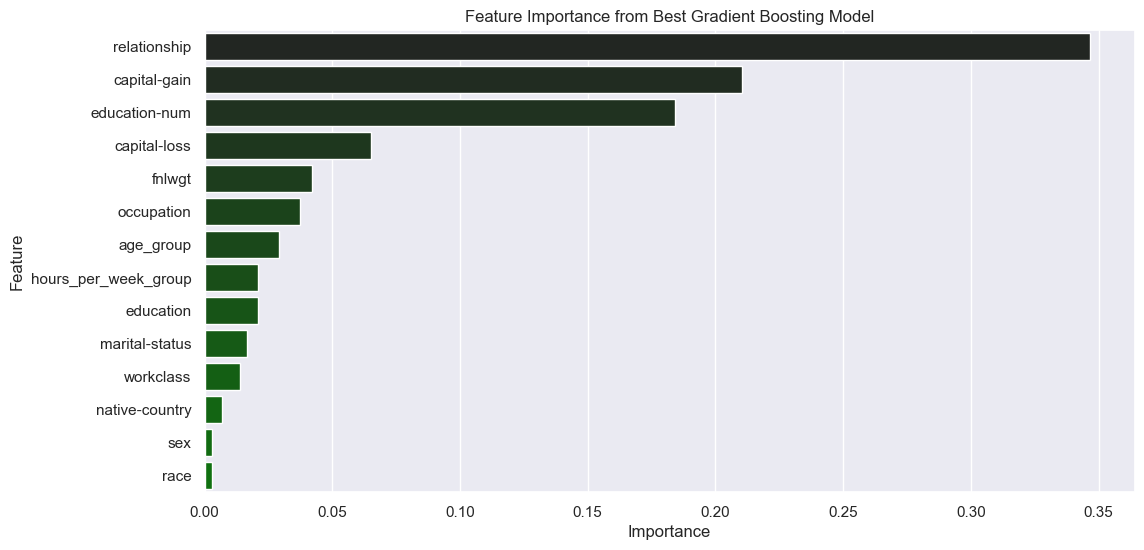

In [29]:
#Visualising feature importance of best model
importances = best_gb.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette= sns.dark_palette("green", n_colors=14, reverse=False))  
plt.title('Feature Importance from Best Gradient Boosting Model')
plt.show()


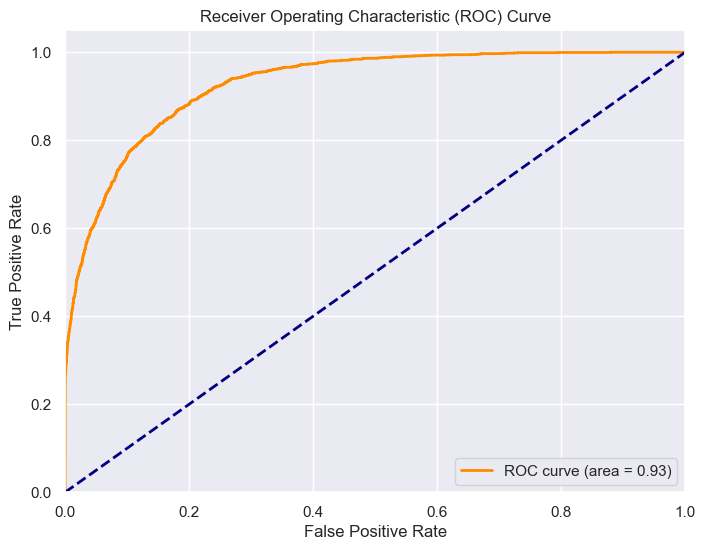

In [30]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve, auc

y_prob = best_gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **Conclusion**

This project successfully developed and evaluated machine learning models to predict whether an individual's annual income is lower than or exceeds $50K using the UCI Adult Census Income dataset. 

Through comprehensive data cleaning, feature engineering, and encoding, the dataset was transformed for effective modeling. 

Multiple classification algorithms were compared, with **Gradient Boosting Model** delivering the best performance **(87%)** after hyperparameter tuning.

The final model demonstrated robust accuracy and balanced precision and recall, indicating reliable predictions for both income classes. Feature importance analysis highlighted education level, occupation, marital status, and hours worked per week as the most influential factors in income prediction. 

Overall, this project showcases the value of machine learning in extracting actionable insights from demographic and employment data, and emphasizes the importance of careful preprocessing and model selection in real-world classification tasks.

### Next Steps

The next steps in this project are to integrate SHAP or LIME for model explainability and to deploy the model as a web application.